# First Order Optimization Methods

This notebook is supposed to explain how to use the repo, aswell as providing basic facts about first order optimization methods, that are optimization methods that require at least one first-derivative/gradient. A great overview by Sebastian Ruder of such methods can be found at [arXiv:1609.04747](https://arxiv.org/abs/1609.04747).

In the following, we aim at minimizing a function $L : \Theta \mapsto \mathbb{R}$, with variable $\theta$. To obtain theoretical guarantees of convergence to a minimum, $L$ is typically assumed to be convex. But this theoretical necessity doesn't discourage people from applying optimization methods to non-convex functions, in the hope of finding their global minima (or at least a local one with acceptable suboptimality). The following notebook is not supposed to be theoretical, but will just highlight some cool stuff about classical optimization methods.

In [1]:
# Global import 

import numpy as np 
import matplotlib.pyplot as plt

## Finding the minimum of a function

### Gradient Descent 

The most basic optimization method is the Gradient Descent with update rule given by $$\theta = \theta - \eta \nabla_\theta L(\theta)~.$$

Parameters $\theta$ are updated moving in the direction of $-\nabla_\theta L(\theta)$, up to $\eta$ which is the learning rate. Let's apply it to the non-convex [Three Hump Camel function](https://www.sfu.ca/~ssurjano/camel3.html) with global minimum at $f(0,0) = 0$. 

First, let's plot the function to minimize.

/var/folders/pj/8xdp38kd24j_jntrmw7xcl640000gn/T/ipykernel_4969/3996515456.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


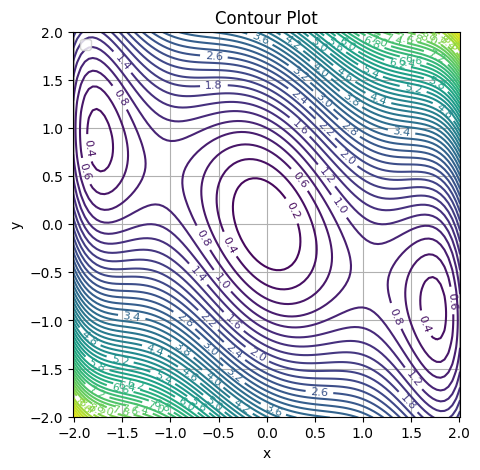

In [2]:
from first_order_optim.model import ThreeHumpCamel

# Initialize function 
x0, y0 = 1.8, -1.8
function = ThreeHumpCamel(x0, y0)

# Plot
x_vals = np.linspace(-2.01, 2.01, 100)
y_vals = np.linspace(-2.01, 2.01, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = function.evaluate(X, Y)

plt.figure(figsize=(5, 5))
contours = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.title("Contour Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()


As you can see the function is not convex, hence the GD may not converge to the global minimum at $(0,0)$. The following cell performs the GD method for multiple choices of learning rate $\eta$.

In [3]:
def plot_threehump_optimizer(xs: np.ndarray, ys: np.ndarray, optimizer_name: str, optimizer = None):
    x_vals = np.linspace(-2.01, 2.01, 100)
    y_vals = np.linspace(-2.01, 2.01, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = function.evaluate(X, Y)

    plt.figure(figsize=(8, 6))
    contours = plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.clabel(contours, inline=True, fontsize=8)
    plt.plot(xs, ys, marker='o', color='red', label=optimizer_name)
    if optimizer is not None:
        plt.title(f"Optimizer Trajectory with $\eta=${optimizer.lr}")
    else:
        plt.title("Optimizer Trajectory")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
/var/folders/pj/8xdp38kd24j_jntrmw7xcl640000gn/T/ipykernel_4969/1612913100.py:12: SyntaxWarning: invalid escape sequence '\e'
  plt.title(f"Optimizer Trajectory with $\eta=${optimizer.lr}")


In [4]:
from first_order_optim.optimizer import SGD

# Initialize function and starting point (x0, y0)
x0, y0 = 1.8, -1.8
function = ThreeHumpCamel(x0, y0)

# Initialize the GD optimizer, the fact that it is called SGD will be clear later on.
GD = SGD(learning_rate=0.6)

# Number of optimization steps
n_steps = 35

# Lists for optimizer trajectory 
xs_gd, ys_gd = np.zeros(n_steps + 1), np.zeros(n_steps + 1)
xs_gd[0], ys_gd[0] = x0, y0
    
# Optimizer Loop
for i in range(n_steps):

    # Obtain gradient of the function with respect to x and y
    grads = function.backward()

    # Obtain new (x,y) via Gradient Descent step
    new_params = GD.step(function.params, grads)

    # Upadate (x,y)
    function.update(new_params)

    # Stock the optimizer trajectory
    xs_gd[i+1], ys_gd[i+1] = new_params['x'], new_params['y']

Now, let's plot the optimizer trajectory!

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


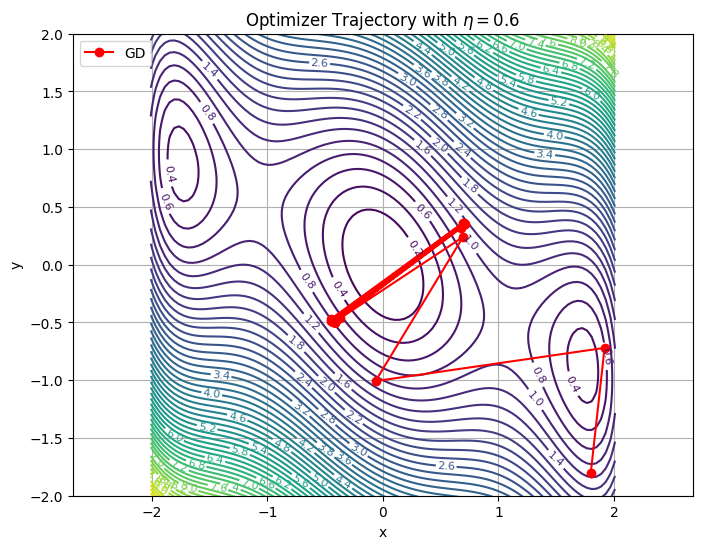

In [5]:
plot_threehump_optimizer(xs_gd, ys_gd, optimizer_name='GD', optimizer=GD)

Doesn't look good ... We keep bouncing around the global minimum and never reach it. This is due to the learning rate $\eta$ that may be to high. Let's reduce it.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


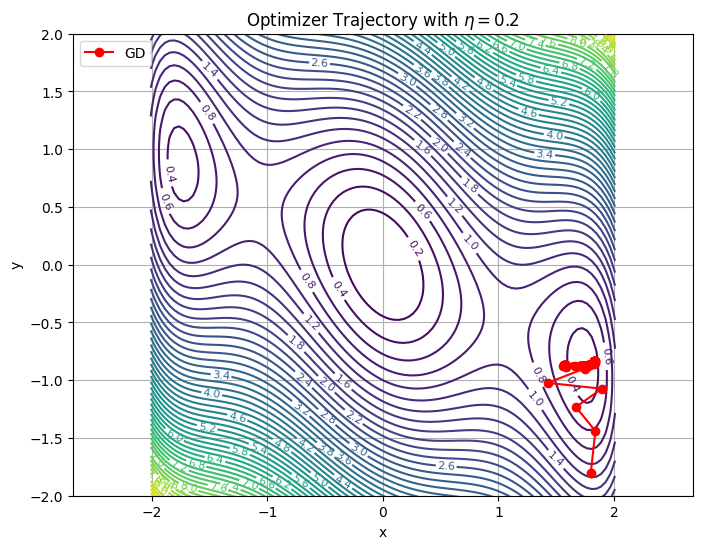

In [6]:
x0, y0 = 1.8, -1.8
function = ThreeHumpCamel(x0, y0)

# New learning rate
GD = SGD(learning_rate=0.2)

n_steps = 35
xs_gd, ys_gd = np.zeros(n_steps + 1), np.zeros(n_steps + 1)
xs_gd[0], ys_gd[0] = x0, y0
    
for i in range(n_steps):
    grads = function.backward()
    new_params = GD.step(function.params, grads)
    function.update(new_params)
    xs_gd[i+1], ys_gd[i+1] = new_params['x'], new_params['y']

plot_threehump_optimizer(xs_gd, ys_gd, optimizer_name='GD', optimizer=GD)

At this point, the optimization is falling into a local minimum due to a learning rate that is too low. As you can see, tuning this hyperparameter is not always straightforward. One common strategy to address this challenge is to start with a relatively large learning rate to make faster progress early on, and then gradually decrease it over time. This allows the optimizer to explore broadly in the beginning, and fine-tune more cautiously as it converges. When fitting a model to data, this approach reflects the intuition that we can afford to be aggressive early in the training process, but should become more conservative once we’ve already incorporated a significant portion of the data. One way to do it is by using schedulers that update the learning rate during the optimization process. 

For instance, a decay learning rate may be $$\eta_t = \frac{\eta_0}{1+kt}~,$$ with $k$ being a deacay rate. Let's use it.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


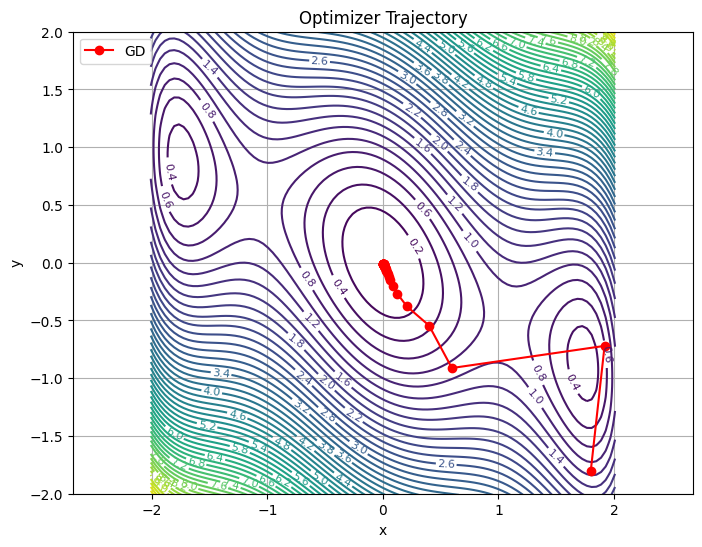

In [7]:
from first_order_optim.scheduler import DecayRateScheduler

x0, y0 = 1.8, -1.8
function = ThreeHumpCamel(x0, y0)

# High learning rate to begin with, and initialization of the scheduler.
GD = SGD(learning_rate=0.6)
sch = DecayRateScheduler(optimizer=GD, decay_rate=0.5)

n_steps = 35
xs_gd, ys_gd = np.zeros(n_steps + 1), np.zeros(n_steps + 1)
xs_gd[0], ys_gd[0] = x0, y0
    
for i in range(n_steps):
    grads = function.backward()
    new_params = GD.step(function.params, grads)
    function.update(new_params)
    xs_gd[i+1], ys_gd[i+1] = new_params['x'], new_params['y']
    # Add a scheduler step that will update the learning rate of the optimizer internally.
    sch.step()

plot_threehump_optimizer(xs_gd, ys_gd, optimizer_name='GD')

That is a lot better! We are indeed making large updates early on, and reducing the learning rate step by step to converge smoothly to the global minimum. Have a scheduler is a good practice since it can helps dodging local minima at the beginning at then stuck to the hopefully global one at the end.

### Momentum Optimizer

Gradient Descent is the most basic optimization method, often referred to as the "vanilla" optimizer. However, more sophisticated methods exist. You can explore some of them in the optimizer folder, where they are implemented and ready to be experimented with.

As an example, we’ll showcase the Momentum optimizer, whose update rule is given by:

\begin{align*}
    &v_t = \gamma v_{t-1} + (1 - \gamma) \nabla_\theta L(\theta)~, \\
    &\theta_{t} = \theta_{t-1} - \eta v_t~.
\end{align*}
The idea is to add a velocity $v_t$ term: when successive gradients point in similar directions, the optimizer builds up speed, allowing it to move more confidently in that direction—effectively "smoothing" the update path and accelerating convergence. The overall trajectory will look like a ball rolling through the hills.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


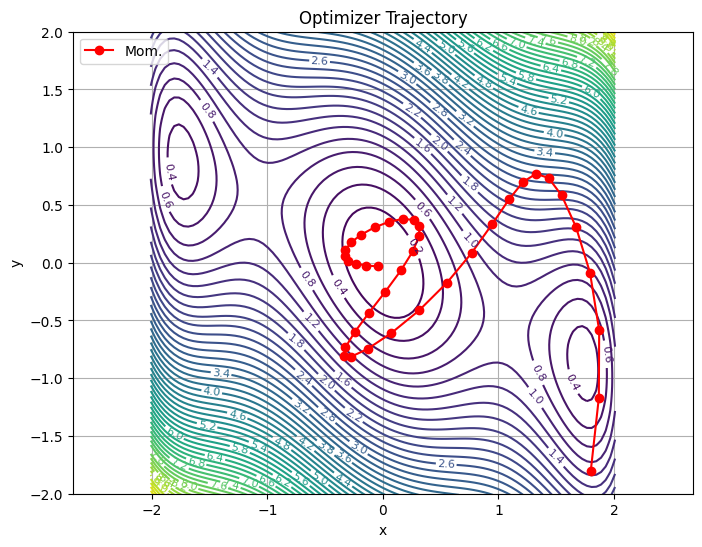

In [8]:
from first_order_optim.optimizer import Momentum

x0, y0 = 1.8, -1.8
function = ThreeHumpCamel(x0, y0)

# Momentum optimizer
momentum = Momentum(learning_rate=0.35, gamma=0.9)

n_steps = 37
xs_momentum, ys_momentum = np.zeros(n_steps + 1), np.zeros(n_steps + 1)
xs_momentum[0], ys_momentum[0] = x0, y0
    
for i in range(n_steps):
    grads = function.backward()
    new_params = momentum.step(function.params, grads)
    function.update(new_params)
    xs_momentum[i+1], ys_momentum[i+1] = new_params['x'], new_params['y']

plot_threehump_optimizer(xs_momentum, ys_momentum, optimizer_name='Mom.')

Now that we have seen some optimizers and how they proceed to try to minimize a function, we move on to their use in model fitting.

## Model Fitting via Loss minimization

When we fit a model to data, what we're really doing is trying to find the best set of parameters so that the model makes predictions that are as close as possible to the actual values. To measure how far off the predictions are, we use a loss function. The higher the loss, the worse the model is doing, the lower the better. So, the goal is simple: minimize the loss. To do so, we treat the model’s parameters like variables we can tweak, and we use an optimizer to help us adjust them step by step. Over time, the optimizer pushes the parameters toward values that reduce the loss, ideally leading to a model that doesn’t just memorize the training data, but also works well on new, unseen data. 

To illustrate this, let’s take the example of a linear model. Suppose we have a dataset $(X, y)$, where $X \in \mathbb{R}^{N \times d}$ is the matrix of observations and $y \in \mathbb{R}^N$ is the associated vector of labels. We assume that the output $y$ can be modeled as a linear combination of the inputs, that is:
$$
y^i = \theta^\top x^i + c~,
$$
where $x^i \in \mathbb{R}^d$ is the $i$-th observation with corresponding label $y^i \in \mathbb{R}$, and $(\theta, c) \in \mathbb{R}^d \times \mathbb{R}$ are the weights and bias to be learned.

To fit this linear model to our dataset, we choose the mean squared error (MSE) as our loss function:
$$
L(\hat{y},y) = \frac{1}{N} \sum_{i=1}^N (\hat{y}^i - y^i)^2~,
$$
where $\hat{y}$ is the vector of predictions given by $\hat{y} = \hat{\theta}^\top X + \hat{c}$, with $(\hat{\theta}, \hat{c})$ being the estimated parameters. The loss $L$ is therefore a function of these parameters, and we can apply an optimization algorithm to find the values that minimize it—i.e., those that best reproduce the data $(X, y)$.

As mentioned earlier, first-order optimization methods require the gradient of the loss with respect to the parameters. This can be computed using the chain rule to obtain:
$$
\nabla_w L = \frac{2}{N}\sum_{i=1}^N (\hat{y}^i - y^i)x^i \quad \text{and} \quad \partial_c L = \frac{2}{N}\sum_{i=1}^N (\hat{y}^y - y^i)~.
$$

This is just a quick overview of loss minimization, but it should be enough to understand the rest of the notebook.


### Batched, Stochastic, and Mini-Batch Gradient Descent

Applying the naive Gradient Descent algorithm we saw earlier in this setting is known as batch gradient descent. At each optimization step, we use the entire dataset $(X,y)$ to compute the derivate mentionned before and make the update step. to compute the derivatives mentioned above and perform a parameter update. One full pass over the dataset like this is called an epoch. The computational cost of using the entire dataset at each optimization step can be an issue.

In contrast, stochastic gradient descent (SGD) updates the parameters using only one data point at a time. At each step, we randomly pick a single example $(x^i, y^i)$, compute the gradient using just that point, and update the parameters. As a result, going through the entire dataset once requires $N$ optimization steps, but each individual step is much faster. This approach is called stochastic because it doesn’t use the true gradient over the full dataset, but rather a noisy, single-point estimate of it. Fortunately, since the data points are chosen at random (usually ensured in practice by shuffling the dataset at the beginning of each epoch), this estimate is unbiased. However, it can have high variance from one step to the next. While this noise can be beneficial by helping the algorithm escape local minima, it also means the loss may fluctuate significantly rather than decrease smoothly.



A compromise between batch and stochastic methods is mini-batch gradient descent. Instead of using the whole dataset or just one point, we split the data into small batches (for example, 32 or 128 samples). Each update is then based on the average gradient over one mini-batch. This provides a good balance: it's more stable than SGD by reducing the variance of the gradient estimate between each update and faster than full batch gradient descent.

Hence at each step, the update rule is the same for each approach, only the quantity of data used differs. This explain why only a single SGD method is implemented, because it handles all the cases. The quantity of data used at each step is handle through the training loop. 

Let's see how it goes, using $d=1$ for ease of plotting.

In [9]:
# Since randomness will be involved, we set the seed
np.random.seed(1)

In [10]:
# Creating a Linear dataset with noise

# True parameters, to recover
w, c = np.array([4.]), -2

# Number of observations
N = 250

# Dataset 
X = np.random.random_sample((N, 1))
noise = np.random.normal(0.0, 0.5, (N,))
y = X @ w + c + noise

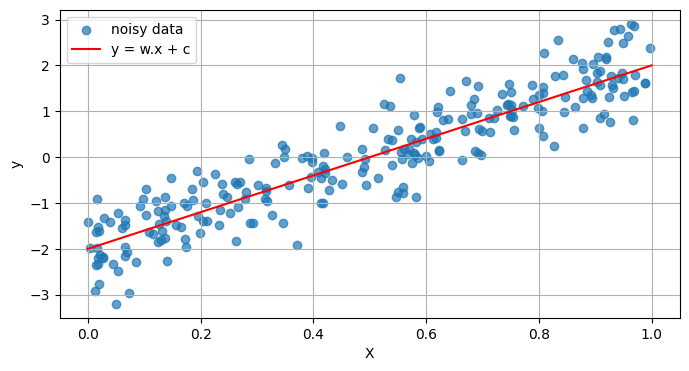

In [11]:
plt.figure(figsize=(8, 4))
plt.scatter(X,y, alpha=0.7, label = 'noisy data')
plt.plot(np.linspace(0,1,100), [ w*x + c for x in np.linspace(0,1,100)], color='red', label=f'y = w.x + c')
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

The best we could do is to exactly recover $(w = 4, c = -2)$, hence estimating the exact relation given by the redline.

Now, we will implement the loss minimization procedure via the Trainer helper. It basicaly reproduces the optimization procedure we saw earlier to minimize functions, but in the context of model fitting. Schematically it does : For epoch -> Shuffle -> For bacth -> Make prediction -> Calculate loss + gradients of the loss wrt params -> Take optimizer step -> Update model.

##### Batched GD

In [12]:
from first_order_optim.model import LinearModel
from first_order_optim.loss import MSELoss
from first_order_optim.utils import Trainer

In [13]:
# Initialize model, loss, optimizer
model = LinearModel(dim=1)
loss = MSELoss()
optimizer = SGD(learning_rate=0.7)

# Training loop for Batch GD, hence batch_size = number of observation
epochs = 35
batch_size = N
trainer = Trainer(model, loss, optimizer, epochs, batch_size)
trainer.train(X, y)

# Obtain the estimated parameters
w_esti, c_esti = model.params['coef'].item(), model.params['intercept'].item()
# Print estimations 
print(f"\nEstimated w = {w_esti:.4f}")
print(f"\nEstimated c = {c_esti:.4f}")



Estimated w = 3.9742

Estimated c = -1.9646


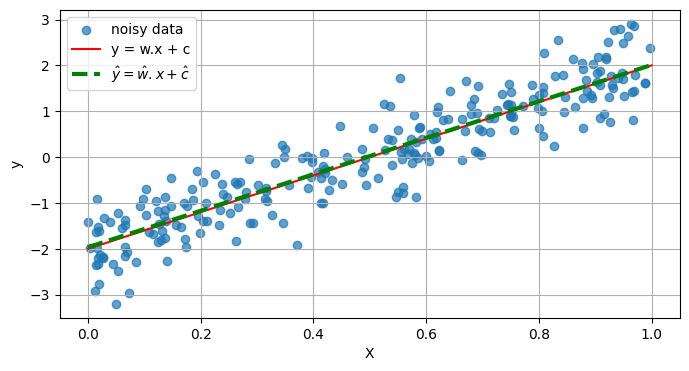

In [14]:
# Plot estimated y
plt.figure(figsize=(8, 4))
plt.scatter(X,y, alpha=0.7, label = 'noisy data')
plt.plot(np.linspace(0,1,100), [ w*x + c for x in np.linspace(0,1,100)], color='red', label=f'y = w.x + c')
plt.plot(np.linspace(0,1,100), [ w_esti*x + c_esti for x in np.linspace(0,1,100)], color='green', linestyle='dashed',
     linewidth=3,label=r'$\hat{y} = \hat{w}.x + \hat{c}$')
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Not too bad! Since the amount of data is small, using a batched GD is perfectly fine and doesn't take that much time, but for more larger and complicated dataset, this may not be a good choice. Let's look at the loss values through the training loop.

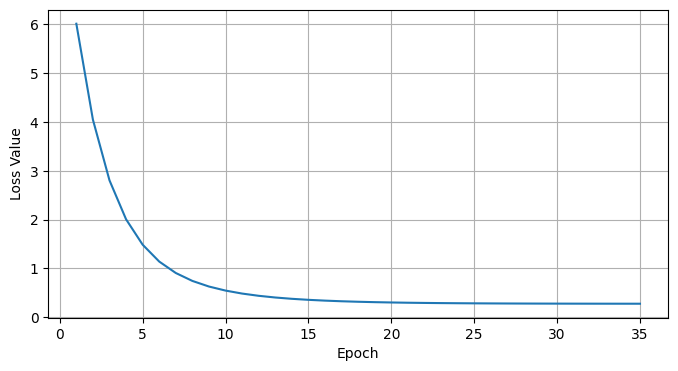

In [15]:
# Fetch the loss values from the Trainer object 
losses = trainer.get_loss_cache().reshape(epochs,)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1,epochs+1), losses)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.show()

The loss is indeed decreasing smoothly as expected, almost reaching a plato. It suggests that adding more epoch steps may not be that beneficial.

##### Stochastic GD

We basically repeat the process for the Stochastic GD method. 

In [16]:
# Initialize model, loss, optimizer
model = LinearModel(dim=1)
loss = MSELoss()
optimizer = SGD(learning_rate=0.7)

# Training loop for Batch GD, hence batch_size = 1, one sample at a time for SGD
epochs = 35
batch_size = 1
trainer = Trainer(model, loss, optimizer, epochs, batch_size)
trainer.train(X, y)

# Obtain the estimated parameters
w_esti, c_esti = model.params['coef'].item(), model.params['intercept'].item()

# Print estimations 
print(f"\nEstimated (w,c) = ({w_esti:.4f},{c_esti:.4f})")



Estimated (w,c) = (6.4097,-2.6162)


This is way off. Let's repeat the procedure multiple times. 

In [17]:
n_tries = 5

for _ in range(n_tries):
    # Initialize model, loss, optimizer
    model = LinearModel(dim=1)
    loss = MSELoss()
    optimizer = SGD(learning_rate=0.7)

    # Training loop for Batch GD, hence batch_size = 1, one sample at a time for SGD
    epochs = 35
    batch_size = 1
    trainer = Trainer(model, loss, optimizer, epochs, batch_size)
    trainer.train(X, y)

    # Obtain the estimated parameters
    w_esti, c_esti = model.params['coef'].item(), model.params['intercept'].item()

    # Print estimations 
    print(f"\nEstimated (w,c) = ({w_esti:.4f},{c_esti:.4f})")


Estimated (w,c) = (-12.3455,-0.9788)

Estimated (w,c) = (6.0747,-4.1594)

Estimated (w,c) = (3.2756,-1.9694)

Estimated (w,c) = (4.8214,-3.8152)

Estimated (w,c) = (8.5512,2.9914)


Well, this doesn't seems good. One of the issue here is that we have to few samples $(N=250)$, hence the stochasticity of the procedure is taking over since the one-point estimation is very noisy. This doesn't allow for the convergence since the noise can't be averaged out. But in general, SGD should be used with batches. Just for illustration purposes, we will plot the loss values for the last training loop of this SGD, only for the first epoch.

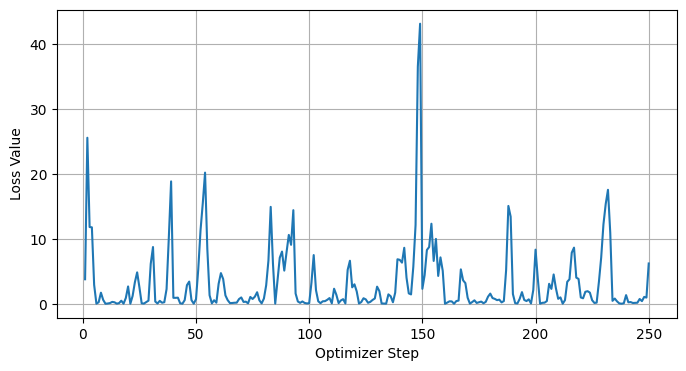

In [ ]:
# Fetch the loss values from the Trainer object 
losses = trainer.get_loss_cache().flatten()
# Plot
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1,251), losses[:250])
plt.grid()
plt.xlabel('Optimizer Step')
plt.ylabel('Loss Value')
plt.show()


Well stochasticity wins.

##### Mini-Batch SGD

We finally implement the mini-batch SGD, and hope that stochasticity will now be controlled.

In [27]:
# Initialize model, loss, optimizer
model = LinearModel(dim=1)
loss = MSELoss()
optimizer = SGD(learning_rate=0.7)

# Training loop for Batch GD, hence batch_size = 50
epochs = 35
batch_size = 50
trainer = Trainer(model, loss, optimizer, epochs, batch_size)
trainer.train(X, y)

# Obtain the estimated parameters
w_esti, c_esti = model.params['coef'].item(), model.params['intercept'].item()

# Print estimations 
print(f"\nEstimated (w,c) = ({w_esti:.4f},{c_esti:.4f})")


Estimated (w,c) = (4.0241,-2.0860)


Quick and accurate! Let's repeat the process to be sure that we didn't have too much luck.

In [28]:
n_tries = 5

for _ in range(n_tries):
    # Initialize model, loss, optimizer
    model = LinearModel(dim=1)
    loss = MSELoss()
    optimizer = SGD(learning_rate=0.7)

    # Training loop for Batch GD, hence batch_size = 50
    epochs = 35
    batch_size = 50
    trainer = Trainer(model, loss, optimizer, epochs, batch_size)
    trainer.train(X, y)

    # Obtain the estimated parameters
    w_esti, c_esti = model.params['coef'].item(), model.params['intercept'].item()

    # Print estimations 
    print(f"\nEstimated (w,c) = ({w_esti:.4f},{c_esti:.4f})")


Estimated (w,c) = (3.9396,-2.2254)

Estimated (w,c) = (4.0416,-2.0868)

Estimated (w,c) = (4.0708,-2.1235)

Estimated (w,c) = (4.2268,-1.7439)

Estimated (w,c) = (4.0759,-1.9185)


Seems good! Let's plot the loss values for the last mini-batch optimizer.

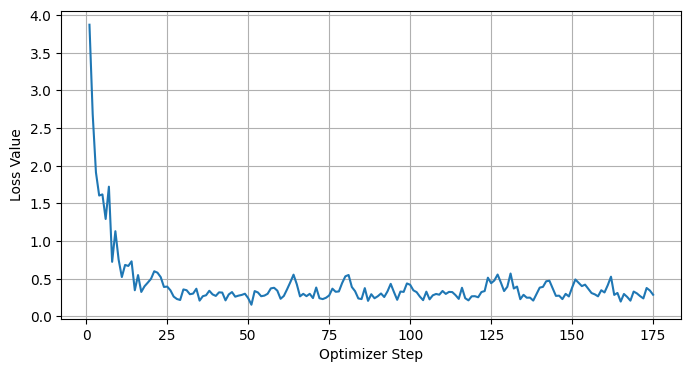

In [34]:
# Fetch the loss values from the Trainer object 
losses = trainer.get_loss_cache().flatten()
# Plot
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1,len(losses)+1), losses)
plt.grid()
plt.xlabel('Optimizer Step')
plt.ylabel('Loss Value')
plt.show()


We indeed still notice the fluctuation, but the optimization procedure is so much faster.

Finally, we will introduce the AdaGrad optimizer, that is particularty suited for sparse data.

### AdaGrad for Sparse Data

Another optimizer worth checking out is Adagrad. It's a tweak on regular gradient descent that adjusts the learning rate separately for each parameter. The idea is simple: if a parameter has been updated a lot, Adagrad will slow down its learning rate. On the other hand, if a parameter barely changes — like one for rare feature — it gets a relatively larger learning rate. This makes Adagrad really useful when working with sparse data, like in text or recommendation systems, where some features show up only once in a while but still matter.

The update rule looks like this:

$$
\theta_t = \theta_{t-1} - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot g_t
$$

where:
-  $g_t$ is the gradient at time step $t$,
- $G_t$ is the sum of the squares of all past gradients (accumulated per parameter),
- $\eta$ is the initial learning rate,
- and $\epsilon$ is a small number to avoid dividing by zero.

So, over time, frequently updated parameters slow down via the accumulation of gradient in $G_t$, and the rare ones get a chance to catch up.


Let's illustrate this by creating a sparse linear dataset.

In [65]:
# Generate sparse data

d = 2000 #number of dimension of the input x^i 
N = 10000

indices = np.random.randint(0, d, size=N)
X = np.eye(d)[indices] 
w = np.random.randn(d)
c = -2.0
noise = np.random.normal(0.0, 0.1, size=N)
y = w[indices] + c + noise

We basically created an observation matrix $X$ in which each observation $x^i \in\mathbb{R}^d$ has only one single input that is $1$, and the others are $0$. Parameters to estimate are now $(w,c)\in\mathbb{R}^d\times\mathbb{R}$.

Let's first use mini-batch GD.

In [69]:
# Initialize model, loss, optimizer
model = LinearModel(dim=d)
loss = MSELoss()
optimizer = SGD(learning_rate=0.7)

# Training loop for Batch GD, hence batch_size = 100
epochs = 10
batch_size = 500
trainer_sgd = Trainer(model, loss, optimizer, epochs, batch_size)
trainer_sgd.train(X, y)

# Obtain the estimated parameters
w_esti_sgd, c_esti_sgd = model.params['coef'], model.params['intercept']

# Compute MSE for weights and bias 
mse_w_sgd = np.mean((w_esti_sgd - w)**2).item()
print(f"MSE on w: {mse_w_sgd:.4f}")
bias_error_sgd = abs(c_esti_sgd - c).item()
print(f"Error on c: {bias_error_sgd:.4f}")

MSE on w: 1.5969
Error on c: 0.0343


Same with Adagrad.

In [70]:
from first_order_optim.optimizer import AdaGrad

# Initialize model, loss, optimizer
model = LinearModel(dim=d)
loss = MSELoss()
optimizer = AdaGrad(learning_rate=0.7)

# Training loop for Batch GD, hence batch_size = 100
epochs = 10
batch_size = 500
trainer_ada = Trainer(model, loss, optimizer, epochs, batch_size)
trainer_ada.train(X, y)

# Obtain the estimated parameters
w_esti_ada, c_esti_ada = model.params['coef'], model.params['intercept']

# Compute MSE for weights and bias 
mse_w_ada = np.mean((w_esti_ada - w)**2).item()
print(f"MSE on w: {mse_w_ada:.4f}")
bias_error_ada = abs(c_esti_ada - c).item()
print(f"Error on c: {bias_error_ada:.4f}")

MSE on w: 0.0279
Error on c: 0.0621


This seems much better. Let's compare the losses.

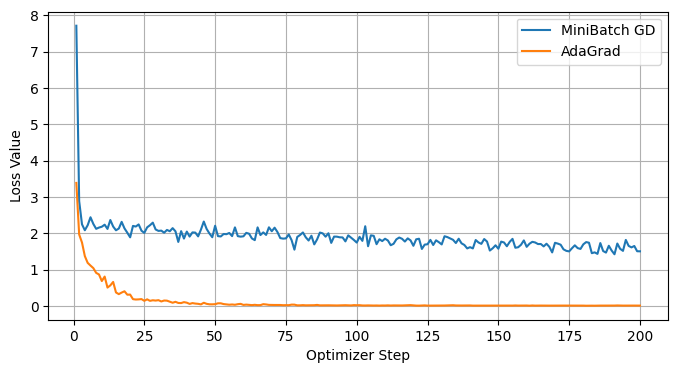

In [71]:
losses_sgd = trainer_sgd.get_loss_cache().flatten()
losses_ada = trainer_ada.get_loss_cache().flatten()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1,len(losses_sgd)+1), losses_sgd, label='MiniBatch GD')
plt.plot(np.arange(1,len(losses_ada)+1), losses_ada, label='AdaGrad')
plt.grid()
plt.xlabel('Optimizer Step')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


As you can see, AdaGrad is much more suited for this kind of data.